# ch-02. 판다스 시작하기 (skip ch.01 )
## 02-1. 데이터 집합 불러오기

In [2]:
import pandas as pd
import os

In [3]:
# Windows
cpath = os.getcwd()
cpath

'C:\\Users\\kiip\\Documents\\github\\doit_pandas'

In [5]:
# Windows
os.chdir(cpath + '\\data')
os.getcwd()

'C:\\Users\\kiip\\Documents\\github\\doit_pandas\\data'

### - (p.32) tsv 파일 불러오기

In [8]:
df = pd.read_csv('gapminder.tsv', sep = '\t')
df.head()

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106


### - (p.33) 데이터 살펴보기

In [15]:
print(type(df))
type(df)

<class 'pandas.core.frame.DataFrame'>


pandas.core.frame.DataFrame

In [16]:
df.shape

(1704, 6)

In [17]:
# shgpe - 인덱스 활용
df_shape = df.shape
df_shape[0]

1704

In [18]:
df_shape[1]

6

In [20]:
df.columns

Index(['country', 'continent', 'year', 'lifeExp', 'pop', 'gdpPercap'], dtype='object')

In [21]:
# columns - 인덱스 활용
df_col = df.columns
df_col[0]

'country'

In [22]:
df_col[3]

'lifeExp'

In [23]:
df_col[3][4]

'E'

In [40]:
df.dtypes

country       object
continent     object
year           int64
lifeExp      float64
pop            int64
gdpPercap    float64
dtype: object

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1704 entries, 0 to 1703
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   country    1704 non-null   object 
 1   continent  1704 non-null   object 
 2   year       1704 non-null   int64  
 3   lifeExp    1704 non-null   float64
 4   pop        1704 non-null   int64  
 5   gdpPercap  1704 non-null   float64
dtypes: float64(2), int64(2), object(2)
memory usage: 80.0+ KB


## 02-2. 데이터 추출하기

### - (p.36) 열 단위 데이터 추출

In [31]:
country_df = df['country']
country_df

0       Afghanistan
1       Afghanistan
2       Afghanistan
3       Afghanistan
4       Afghanistan
           ...     
1699       Zimbabwe
1700       Zimbabwe
1701       Zimbabwe
1702       Zimbabwe
1703       Zimbabwe
Name: country, Length: 1704, dtype: object

In [32]:
type(country_df)

pandas.core.series.Series

In [33]:
country_df.head()

0    Afghanistan
1    Afghanistan
2    Afghanistan
3    Afghanistan
4    Afghanistan
Name: country, dtype: object

In [34]:
subset = df[['country', 'continent', 'year']]
subset.head()

,country,continent,year
0,Afghanistan,Asia,1952
1,Afghanistan,Asia,1957
2,Afghanistan,Asia,1962
3,Afghanistan,Asia,1967
4,Afghanistan,Asia,1972


In [35]:
type(subset)

pandas.core.frame.DataFrame

### - (p.38) 행 단위 데이터 추출 (loc vs. iloc)

#### (1) loc : 인덱스 기준 행 추출

In [42]:
df.loc[0]

country      Afghanistan
continent           Asia
year                1952
lifeExp           28.801
pop              8425333
gdpPercap     779.445314
Name: 0, dtype: object

##### * 마지막 행 추출 1 (series 반환)

In [43]:
number_of_rows = df.shape[0]
last_row_index = number_of_rows - 1
df.loc[last_row_index]

country        Zimbabwe
continent        Africa
year               2007
lifeExp          43.487
pop            12311143
gdpPercap    469.709298
Name: 1703, dtype: object

##### * 마지막 행 추출 2 (df 반환)

In [44]:
df.tail()

,country,continent,year,lifeExp,pop,gdpPercap
1699,Zimbabwe,Africa,1987,62.351,9216418,706.157306
1700,Zimbabwe,Africa,1992,60.377,10704340,693.420786
1701,Zimbabwe,Africa,1997,46.809,11404948,792.449960
1702,Zimbabwe,Africa,2002,39.989,11926563,672.038623
1703,Zimbabwe,Africa,2007,43.487,12311143,469.709298


In [47]:
df.tail(1)

,country,continent,year,lifeExp,pop,gdpPercap
1703,Zimbabwe,Africa,2007,43.487,12311143,469.709298


##### * 여러 행 추출 

In [48]:
df.loc[[0, 99, 999]]

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
99,Bangladesh,Asia,1967,43.453,62821884,721.186086
999,Mongolia,Asia,1967,51.253,1149500,1226.041130


##### * loc 과 tail 반환 자료형 비교

In [52]:
subset_loc = df.loc[0]
subset_loc

country      Afghanistan
continent           Asia
year                1952
lifeExp           28.801
pop              8425333
gdpPercap     779.445314
Name: 0, dtype: object

In [56]:
type(subset_loc)

pandas.core.series.Series

In [57]:
subset_tail = df.tail(1)
subset_tail

,country,continent,year,lifeExp,pop,gdpPercap
1703,Zimbabwe,Africa,2007,43.487,12311143,469.709298


In [55]:
type(subset_tail)

pandas.core.frame.DataFrame

#### (2) iloc : 행번호 기준 행 추출

In [35]:
df.iloc[1]

country      Afghanistan
continent           Asia
year                1957
lifeExp           30.332
pop              9240934
gdpPercap      820.85303
Name: 1, dtype: object

##### * 마지막 행 추출 (음수 사용 가능)

In [58]:
df.iloc[-1]

country        Zimbabwe
continent        Africa
year               2007
lifeExp          43.487
pop            12311143
gdpPercap    469.709298
Name: 1703, dtype: object

##### * 여러 행 추출

In [59]:
df.iloc[[0, 99, 999]]

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
99,Bangladesh,Asia,1967,43.453,62821884,721.186086
999,Mongolia,Asia,1967,51.253,1149500,1226.041130


#### (3) loc vs. iloc 활용

##### * 슬라이싱 (recommended)

In [69]:
# 모든 행 & 일부 열
# [loc] 열은 열 이름만 사용 가능 (정수 X)
df.loc[:, ['year', 'pop']].head()

,year,pop
0,1952,8425333
1,1957,9240934
2,1962,10267083
3,1967,11537966
4,1972,13079460


In [67]:
# 상동
df.loc[:][['year', 'pop']].head()

,year,pop
0,1952,8425333
1,1957,9240934
2,1962,10267083
3,1967,11537966
4,1972,13079460


In [71]:
# 모든 행 & 일부 열
# [iloc] 열에 열 이름 사용 불가
# [iloc] 행/열에 음수 사용 가능
df.iloc[:, [2, 4, -1]].head()

,year,pop,gdpPercap
0,1952,8425333,779.445314
1,1957,9240934,820.853030
2,1962,10267083,853.100710
3,1967,11537966,836.197138
4,1972,13079460,739.981106


##### * range 메서드

In [73]:
small_range = list(range(5))
small_range

[0, 1, 2, 3, 4]

In [74]:
type(small_range)

list

In [76]:
df.iloc[:, small_range].head()

,country,continent,year,lifeExp,pop
0,Afghanistan,Asia,1952,28.801,8425333
1,Afghanistan,Asia,1957,30.332,9240934
2,Afghanistan,Asia,1962,31.997,10267083
3,Afghanistan,Asia,1967,34.020,11537966
4,Afghanistan,Asia,1972,36.088,13079460


In [77]:
small_range = list(range(3, 6))
small_range

[3, 4, 5]

In [78]:
df.iloc[:, small_range].head()

,lifeExp,pop,gdpPercap
0,28.801,8425333,779.445314
1,30.332,9240934,820.853030
2,31.997,10267083,853.100710
3,34.020,11537966,836.197138
4,36.088,13079460,739.981106


In [55]:
small_range = list(range(0, 6, 2))
small_range

[0, 2, 4]

In [57]:
df.iloc[:, small_range].head()

,country,year,pop
0,Afghanistan,1952,8425333
1,Afghanistan,1957,9240934
2,Afghanistan,1962,10267083
3,Afghanistan,1967,11537966
4,Afghanistan,1972,13079460


##### * 슬라이싱과 range 비교

In [82]:
# the same with "small_range = list(range(3))"
df.iloc[:, :3].head()

,country,continent,year
0,Afghanistan,Asia,1952
1,Afghanistan,Asia,1957
2,Afghanistan,Asia,1962
3,Afghanistan,Asia,1967
4,Afghanistan,Asia,1972


In [83]:
# the same with "small_range = list(range(0, 6, 2))"
df.iloc[:, 0:6:2].head()

,country,year,pop
0,Afghanistan,1952,8425333
1,Afghanistan,1957,9240934
2,Afghanistan,1962,10267083
3,Afghanistan,1967,11537966
4,Afghanistan,1972,13079460


##### * iloc 보다는 loc의 열 이름을 사용할 것

In [86]:
# 비추 / 코드만으로 어떤 데이터를 분석하는 지 파악하기 어려움
df.iloc[[0, 99, 999], [0, 3, 5]]

,country,lifeExp,gdpPercap
0,Afghanistan,28.801,779.445314
99,Bangladesh,43.453,721.186086
999,Mongolia,51.253,1226.041130


In [87]:
# 추천
df.loc[[0, 99, 999], ['country', 'lifeExp', 'gdpPercap']]

,country,lifeExp,gdpPercap
0,Afghanistan,28.801,779.445314
99,Bangladesh,43.453,721.186086
999,Mongolia,51.253,1226.041130


##### * loc vs. iloc 슬라이싱 범위

In [89]:
# loc은 슬라이싱할 때 ~이상 ~이하
df.loc[10:13, ['country', 'lifeExp', 'gdpPercap']]

,country,lifeExp,gdpPercap
10,Afghanistan,42.129,726.734055
11,Afghanistan,43.828,974.580338
12,Albania,55.230,1601.056136
13,Albania,59.280,1942.284244


In [90]:
# iloc은 슬라이싱할 때 ~이상 ~미만
df.iloc[10:13, [0, 3, 5]]

,country,lifeExp,gdpPercap
10,Afghanistan,42.129,726.734055
11,Afghanistan,43.828,974.580338
12,Albania,55.230,1601.056136


## 02-3. 기초적인 통계 계산하기

In [91]:
df.head()

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106


### - (p.48) 그룹화 & 평균

In [96]:
df.groupby('year')['lifeExp'].mean().head()

year
1952    49.057620
1957    51.507401
1962    53.609249
1967    55.678290
1972    57.647386
Name: lifeExp, dtype: float64

In [97]:
# groupby & agg
df.groupby('year', as_index = False) \
  .agg(mean_lifeExp = ('lifeExp', 'mean')) \
  .sort_values('year').head()

,year,mean_lifeExp
0,1952,49.057620
1,1957,51.507401
2,1962,53.609249
3,1967,55.678290
4,1972,57.647386


### - (p.50) 복수개 그룹 & 열의 평균

In [98]:
df.groupby(['year', 'continent'])[['lifeExp', 'gdpPercap']].mean().head()

lifeExp     gdpPercap
year continent                         
1952 Africa     39.135500   1252.572466
     Americas   53.279840   4079.062552
     Asia       46.314394   5195.484004
     Europe     64.408500   5661.057435
     Oceania    69.255000  10298.085650

In [100]:
# groupby & agg
df.groupby(['year', 'continent']) \
  .agg(mean_lifeExp = ('lifeExp', 'mean'),
       mean_gdpPercap = ('gdpPercap', 'mean')) \
  .head()

mean_lifeExp  mean_gdpPercap
year continent                              
1952 Africa        39.135500     1252.572466
     Americas      53.279840     4079.062552
     Asia          46.314394     5195.484004
     Europe        64.408500     5661.057435
     Oceania       69.255000    10298.085650

### - (p.51) 그룹화 & 빈도수

In [123]:
# 그룹화 데이터의 unique한 데이터 갯수
df.groupby('continent')['country'].nunique()

continent
Africa      52
Americas    25
Asia        33
Europe      30
Oceania      2
Name: country, dtype: int64

In [118]:
# 그룹화 데이터 빈도수
df.groupby('continent')['country'].count()

continent
Africa      624
Americas    300
Asia        396
Europe      360
Oceania      24
Name: country, dtype: int64

In [119]:
# groupby & agg
df.groupby('continent', as_index = False) \
  .agg(n_country = ('country', 'count'))

,continent,n_country
0,Africa,624
1,Americas,300
2,Asia,396
3,Europe,360
4,Oceania,24


## 02-4. 그래프 그리기

In [125]:
%matplotlib inline
import matplotlib.pyplot as plt

In [127]:
df_subset = df.groupby('year')['lifeExp'].mean()
df_subset

year
1952    49.057620
1957    51.507401
1962    53.609249
1967    55.678290
1972    57.647386
1977    59.570157
1982    61.533197
1987    63.212613
1992    64.160338
1997    65.014676
2002    65.694923
2007    67.007423
Name: lifeExp, dtype: float64

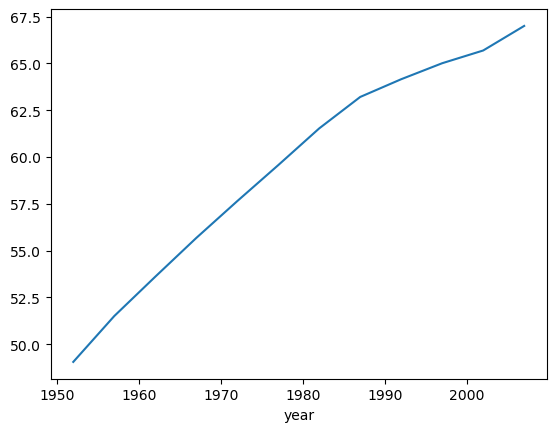

In [95]:
df_subset.plot();

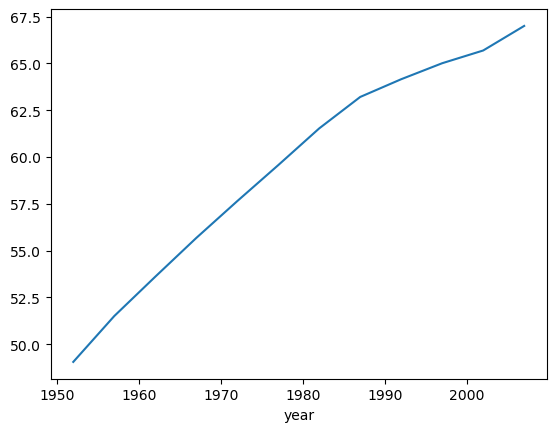

In [132]:
df_subset.plot.line();

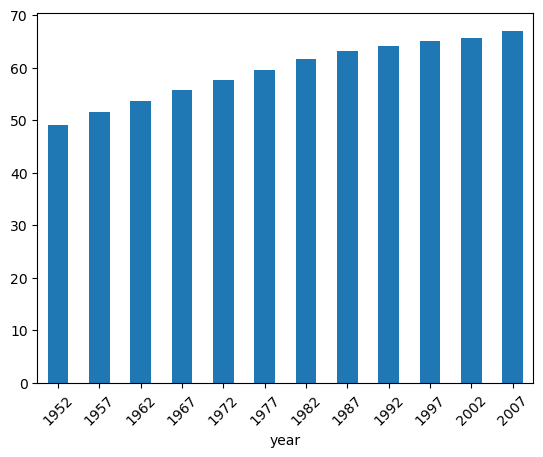

In [130]:
df_subset.plot.bar(rot = 45);

## End.